# Plots for Scientific Research Papers

1
2
3
3


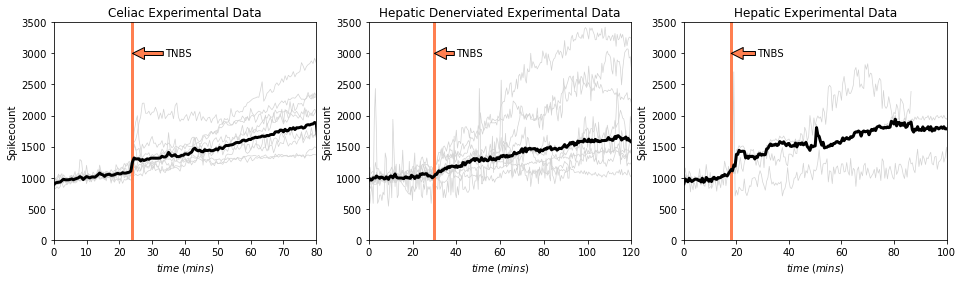

In [147]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly as py
import scipy.io


linenarrow=0.7  #plot line width, thin traces of individual experiments
linemeanwidth=3.0 #plot line width of thick traces (mean of all experiments)
tnbs_time=[1440,1800,1080] #CEL, HEPDN, HEP'
tnbs_markerColour='coral'

plt.figure(figsize=(16, 4))

# load data from textfile
DataAff = scipy.io.loadmat('AfferentDataDetrendposttnbs.mat')

CelAff=DataAff['CelAffdetrend']  #extracts dictionary items for CelAffdetrend into a numpy.ndarray
#type(CelAff)

#taxis=CelAff[:,0]  #np.arange(0.0, max(CelAff.shape)*30, 30)
taxis = np.arange(0.0, max(CelAff.shape)*30, 30)
num_nonzero_cols = (CelAff != 0).sum(1)  #find the denominator for mean calculation
allexp = CelAff[:, 2:min(CelAff.shape)-1];

for i in range(min(CelAff.shape)):
    plt.subplot(131)
    if i is min(CelAff.shape)-1:
        #plot vertical line for TNBS marker
        #meanExpsAlternative=(allexp.sum(1)/np.mean(allexp[0:40]))/num_nonzero_cols
        #plt.plot(taxis/60, meanExpsAlternative, 'grey',linewidth=linemeanwidth) 
        plt.plot([tnbs_time[0]/60,tnbs_time[0]/60],[0,4000],tnbs_markerColour, linewidth=linemeanwidth)
        plt.annotate('TNBS', xy=(tnbs_time[0]/60, 3000), xytext=(tnbs_time[0]/60+10, 2950),
            arrowprops=dict(facecolor=tnbs_markerColour, shrink=2),
            )
        #Plot the mean with thick black line
        #meanExps = np.mean(CelAff[:, 2:min(CelAff.shape)-1]/np.mean(CelAff[0:40, [i+1]]), axis=1)  
        #meanExps = np.mean(CelAff[:, 1:min(CelAff.shape)-1], axis=1)  
        selectedcols=CelAff.take([1,2,3,4,5,6,7,8,9],axis=1)
        meanExps = np.mean(selectedcols, axis=1)
        cel1test=meanExps/np.mean(meanExps[0:40])*1000
        #print(meanExps[128:131])
        plt.plot(taxis/60, (meanExps/np.mean(meanExps[0:40])*1000), 'black',linewidth=linemeanwidth)
    else:
        #plot all the individual experiments with thin grey lines
        Expvals = CelAff[:, [i+1]];
        NonZeroind = [i for i, e in enumerate(Expvals) if e != 0]
        NonZeroExpvals = [Expvals[i] for i in NonZeroind]
        NonZeroExpvals = np.array(NonZeroExpvals) #make numpy array to allow later maths manipulation
        taxis_nz = [taxis[i] for i in NonZeroind] #make numpy array to allow later maths manipulation
        taxis_nz = np.array(taxis_nz)
        
        plt.plot(taxis_nz/60, (NonZeroExpvals/np.mean(CelAff[0:40, [i+1]])*1000), 'lightgrey',linewidth=linenarrow)
        plt.xlabel(r'$time\;(mins)$')
        plt.ylabel('Spikecount')
        plt.title('Celiac Experimental Data')
        #plt.axis([0, 80, -0.2, 2])
        plt.axis([0, 80, 0, 3500])


    
#plt.show()

HepDNAff=DataAff['HepAffDenervateddetrend']  #extracts dictionary items for CelAffdetrend into a numpy.ndarray

taxis=np.arange(0.0, max(HepDNAff.shape)*30, 30)
num_nonzero_cols  = (HepDNAff != 0).sum(1)  #find the demoninator for mean calculation
allexp=HepDNAff[:, 2:min(HepDNAff.shape)-1];

for i in range(min(HepDNAff.shape)-1):
    plt.subplot(132)
    if i is min(HepDNAff.shape)-2:
        #meanExpsAlternative=(allexp.sum(1)/np.mean(allexp[0:40]))/num_nonzero_cols
        #plt.plot(taxis/60, meanExpsAlternative, 'grey',linewidth=linemeanwidth) 
        plt.plot([tnbs_time[1]/60,tnbs_time[1]/60],[0,4000],tnbs_markerColour, linewidth=linemeanwidth)
        plt.annotate('TNBS', xy=(tnbs_time[1]/60, 3000), xytext=(tnbs_time[1]/60+10, 2950),
            arrowprops=dict(facecolor=tnbs_markerColour, shrink=2),
            )
        #meanExps=np.mean(HepDNAff[:, 2:min(HepDNAff.shape)-1]/np.mean(HepDNAff[0:40, [i+1]]), axis=1)
        selectedcols=HepDNAff.take([1,2,3,4,5,6,7,8,9,10],axis=1)
        meanExps = np.mean(selectedcols, axis=1)
        plt.plot(taxis/60, (meanExps/np.mean(meanExps[0:40])*1000), 'black',linewidth=linemeanwidth) 
    else:
        Expvals=HepDNAff[:, [i+1]];
        NonZeroind=[i for i, e in enumerate(Expvals) if e != 0]
        NonZeroExpvals=[Expvals[i] for i in NonZeroind]
        NonZeroExpvals=np.array(NonZeroExpvals) #make numpy array to allow later maths manipulation
        taxis_nz=[taxis[i] for i in NonZeroind] #make numpy array to allow later maths manipulation
        taxis_nz=np.array(taxis_nz)
        plt.plot(taxis_nz/60, (NonZeroExpvals/np.mean(HepDNAff[0:40, [i+1]])*1000), 'lightgrey',linewidth=linenarrow)
        plt.xlabel(r'$time\;(mins)$')
        plt.ylabel('Spikecount')
        plt.title('Hepatic Denerviated Experimental Data')
        #plt.axis([0, 120, -0.2, 2])
        plt.axis([0, 120, 0, 3500])


#plt.show()


HepAff=DataAff['HepAffdetrend']  #extracts dictionar items for HepAff into a numpy.ndarray

taxis=np.arange(0.0, max(HepAff.shape)*30, 30)
num_nonzero_cols  = (HepAff != 0).sum(1)  #find the demoninator for mean calculation
allexp=HepAff[:, 2:min(HepAff.shape)-1];

for i in range(min(HepAff.shape)):
    #print(HepDNAff.shape)
    plt.subplot(133)
    if i is min(HepAff.shape)-1:
        plt.plot([tnbs_time[2]/60,tnbs_time[2]/60],[0,4000],tnbs_markerColour, linewidth=linemeanwidth)
        plt.annotate('TNBS', xy=(tnbs_time[2]/60, 3000), xytext=(tnbs_time[2]/60+10, 2950),
            arrowprops=dict(facecolor=tnbs_markerColour, shrink=2),
            )
        print(min(HepAff.shape)-1)
        selectedcols=HepAff.take([1,2,3],axis=1)
        meanExps = np.mean(selectedcols, axis=1)
        #meanExps=np.mean(HepAff[:, 1:min(HepAff.shape)-1]/np.mean(HepAff[0:40, [i+1]]), axis=1)  
        ###meanExps = np.mean(HepAff[:, 1:min(HepAff.shape)-1], axis=1)
        #meanExps=np.mean(HepDNAff[:, 2:min(HepAff.shape)-1]/np.mean(HepAff[0:40, [i+1]]), axis=1)
        #print(meanExps)
        #print(normfactor)
        plt.plot(taxis/60, (meanExps/np.mean(meanExps[0:40])*1000), 'black',linewidth=linemeanwidth) 
        #meanExpsAlternative=(allexp.sum(1)/np.mean(allexp[0:40]))/num_nonzero_cols
        #plt.plot(taxis/60, meanExpsAlternative, 'grey',linewidth=linemeanwidth) 
    else:
        print(i+1)
        Expvals=HepAff[:, [i+1]];
        NonZeroind=[i for i, e in enumerate(Expvals) if e != 0]
        NonZeroExpvals=[Expvals[i] for i in NonZeroind]
        NonZeroExpvals=np.array(NonZeroExpvals) #make numpy array to allow later maths manipulation
        taxis_nz=[taxis[i] for i in NonZeroind] #make numpy array to allow later maths manipulation
        taxis_nz=np.array(taxis_nz)
        plt.plot(taxis_nz/60, (NonZeroExpvals/np.mean(HepAff[0:40, [i+1]])*1000), 'lightgrey',linewidth=linenarrow)
        plt.xlabel(r'$time\;(mins)$')
        plt.ylabel('Spikecount')
        plt.title('Hepatic Experimental Data')
        plt.axis([0, 100, 0, 3500])


plt.show()

orriginal traces, mean across experiments in black


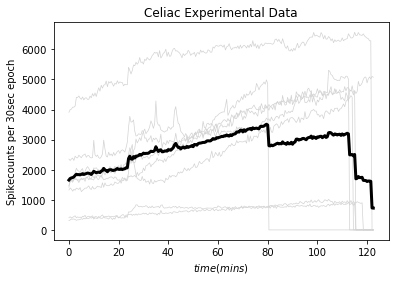

only plot non-zero, normalised on baseline values


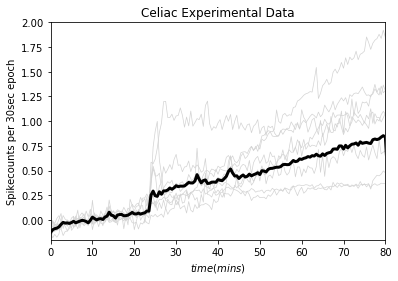

normalised on max values


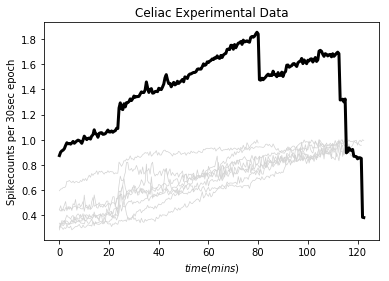

remove baseline


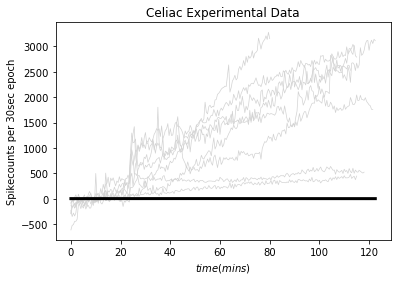

In [2]:
#older code with plot variants
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly as py
import scipy.io


linenarrow=0.7  #plot line width, thin traces of individual experiments
linemeanwidth=3.0 #plot line width of thick traces (mean of all experiments)
#np.nanmean
# load data from textfile
DataAff = scipy.io.loadmat('AfferentDataDetrendposttnbs.mat')
#f = h5py.File('AfferentDataDetrendposttnbs.mat','r') 
#display(f)
#data = f.get('data/variable1') 
#display(data)
DataAff
CelAff=DataAff['CelAffdetrend']  #extracts dictionar items for CelAffdetrend into a numpy.ndarray
#type(CelAff)

taxis=np.arange(0.0, max(CelAff.shape)*30, 30)
num_nonzero_cols  = (CelAff != 0).sum(1)  #find the demoninator for mean calculation
allexp=CelAff[:, 2:min(CelAff.shape)-1];

print('orriginal traces, mean across experiments in black')
for i in range(min(CelAff.shape)-1):
    #print(i)
    if i is min(CelAff.shape)-2:
        meanExps=np.mean(CelAff[:, 2:min(CelAff.shape)-1], axis=1)  
        plt.plot(taxis/60, meanExps, 'black',linewidth=linemeanwidth) 
        #meanExpsAlternative=allexp.sum(1)/num_nonzero_cols
        #plt.plot(taxis/60, meanExpsAlternative, 'grey',linewidth=linemeanwidth) 
        #print(i)
    else:
        plt.plot(taxis/60, CelAff[:, [i+1]], 'lightgrey',linewidth=linenarrow)
        plt.xlabel(r'$time (mins)$')
        plt.ylabel('Spikecounts per 30sec epoch')
        plt.title('Celiac Experimental Data')
        #plt.axis([0, 110, 0, 1.1])
        #and finally plot the mean

    
plt.show()

print('only plot non-zero, normalised on baseline values')
for i in range(min(CelAff.shape)-1):
    #print(i)
    if i is min(CelAff.shape)-2:
        meanExps=np.mean(CelAff[:, 2:min(CelAff.shape)-1]/np.mean(CelAff[0:40, [i+1]]), axis=1)  
        plt.plot(taxis/60, meanExps/np.mean(meanExps[0:40])-1, 'black',linewidth=linemeanwidth) 
        #meanExpsAlternative=(allexp.sum(1)/np.mean(allexp[0:40]))/num_nonzero_cols
        #plt.plot(taxis/60, meanExpsAlternative, 'grey',linewidth=linemeanwidth) 
        #print(i)
    else:
        #print(i)
        Expvals=CelAff[:, [i+1]];
        NonZeroind=[i for i, e in enumerate(Expvals) if e != 0]
        NonZeroExpvals=[Expvals[i] for i in NonZeroind]
        NonZeroExpvals=np.array(NonZeroExpvals) #make numpy array to allow later maths manipulation
        taxis_nz=[taxis[i] for i in NonZeroind] #make numpy array to allow later maths manipulation
        taxis_nz=np.array(taxis_nz)
        plt.plot(taxis_nz/60, NonZeroExpvals/np.mean(CelAff[0:40, [i+1]])-1, 'lightgrey',linewidth=linenarrow)
        #plt.plot(taxis/60, CelAff[:, [i+1]]/np.mean(CelAff[1:40, [i+1]]), 'lightgrey')
        plt.xlabel(r'$time (mins)$')
        plt.ylabel('Spikecounts per 30sec epoch')
        plt.title('Celiac Experimental Data')
        plt.axis([0, 80, -0.2, 2])
        #and finally plot the mean

    
plt.show()





print('normalised on max values')

for i in range(min(CelAff.shape)-1):
    #print(i)
    if i is min(CelAff.shape)-2:
        meanExps=np.mean(CelAff[:, 2:min(CelAff.shape)-1]/np.mean(CelAff[0:40, [i+1]]), axis=1)  
        plt.plot(taxis/60, meanExps/np.mean(meanExps[0:40]), 'black',linewidth=linemeanwidth) 
        #print(i)
    else:
        #print(i)
        Expvals=CelAff[:, [i+1]];
        NonZeroind=[i for i, e in enumerate(Expvals) if e != 0]
        NonZeroExpvals=[Expvals[i] for i in NonZeroind]
        NonZeroExpvals=np.array(NonZeroExpvals) #make numpy array to allow later maths manipulation
        taxis_nz=[taxis[i] for i in NonZeroind] #make numpy array to allow later maths manipulation
        taxis_nz=np.array(taxis_nz)
        plt.plot(taxis_nz/60, NonZeroExpvals/np.max(CelAff[:, [i+1]]), 'lightgrey',linewidth=linenarrow)
        #plt.plot(taxis/60, CelAff[:, [i+1]]/np.mean(CelAff[1:40, [i+1]]), 'lightgrey')
        plt.xlabel(r'$time (mins)$')
        plt.ylabel('Spikecounts per 30sec epoch')
        plt.title('Celiac Experimental Data')
        #plt.axis([0, 110, 0, 1.1])
        #and finally plot the mean

    
plt.show()


print('remove baseline')
for i in range(min(CelAff.shape)-1):
    #print(i)
    if i is min(CelAff.shape)-2:
        meanExps=np.mean(CelAff[:, 2:min(CelAff.shape)-1]/np.mean(CelAff[0:40, [i+1]]), axis=1)  
        plt.plot(taxis/60, meanExps/np.mean(meanExps[0:40]), 'black',linewidth=linemeanwidth) 
        #print(i)
    else:
        #print(i)
        Expvals=CelAff[:, [i+1]];
        NonZeroind=[i for i, e in enumerate(Expvals) if e != 0]
        NonZeroExpvals=[Expvals[i] for i in NonZeroind]
        NonZeroExpvals=np.array(NonZeroExpvals) #make numpy array to allow later maths manipulation
        taxis_nz=[taxis[i] for i in NonZeroind] #make numpy array to allow later maths manipulation
        taxis_nz=np.array(taxis_nz)
        plt.plot(taxis_nz/60, NonZeroExpvals-np.mean(CelAff[0:40, [i+1]]), 'lightgrey',linewidth=linenarrow)
        #plt.plot(taxis/60, CelAff[:, [i+1]]/np.mean(CelAff[1:40, [i+1]]), 'lightgrey')
        plt.xlabel(r'$time (mins)$')
        plt.ylabel('Spikecounts per 30sec epoch')
        plt.title('Celiac Experimental Data')
        #plt.axis([0, 110, 0, 1.1])
        #and finally plot the mean

    
plt.show()


In [3]:
df = pd.DataFrame([1, 0, 2, 3, 0], columns=['a'])
df = df.replace(0, np.NaN)
df.mean()

a    2.0
dtype: float64

In [4]:
# finding number of nonzero elements in each experiment

X = np.array([[1, 2, 3],
              [1, 2, 3],
              [1, 2, 0],
              [1, 2, 0]])

num_nonzero_rows = (X != 0).sum(0)  #.sum(x) function sums the elements over the axis x
#num_nonzero_cols = (X != 0).sum(1)   
 
print(num_nonzero_rows)  #use num[2_nonzero_rows] to get 2

X.sum(0)

[4 4 2]


array([4, 8, 6])

In [5]:
#Phython variable learnings
num_nonzero_cols  = (CelAff != 0).sum(1)
print(num_nonzero_cols)
allexp=CelAff[:, 2:min(CelAff.shape)-1];
AlternativeMean = allexp.sum(1)/num_nonzero_cols
AlternativeMean.shape

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  8  8  8  7  7  5  5  5  5  5  5  4  4  4  4  4  4  4  3  3]


(246,)

In [6]:
#python variable learnings
np.nonzero(CelAff[1:10, [2]])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

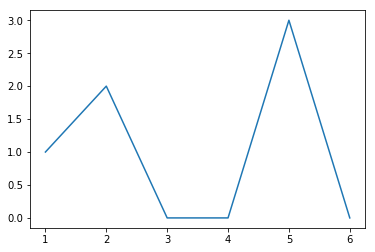

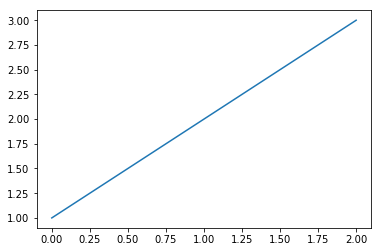

In [7]:
#python learning  - finding where data is non zero to discover how to make a mean calculation 
#that varys over time dependent on the number of non-zero experiments 
mytest=[1,2,0,0,3,0]
plt.plot([1,2,3,4,5,6], mytest)
plt.show()

mytest2 = mytest[:]
mytest2[mytest2 == 0] = mt.nan


mytest[mytest[:] == 0]
res=np.nonzero(mytest)
test2=[i for i, e in enumerate(mytest) if e != 0]
nzvals=[mytest[i] for i in test2]


plt.plot(nzvals)
plt.show()


In [140]:
#testing column versus row operations in arrays

mytest=[[1,2,3],[4,5,6]]
print(mytest)
mytest=np.array(mytest)
print(mytest)
np.mean(mytest,axis=0)
mytest.take([0,1],axis=1)
test2 = HepDNAff[:, 1:min(HepDNAff.shape)-1]
print('array shapes')
print(CelAff.shape)
print(HepDNAff.shape)
print(HepAff.shape)

test2.shape
#testing = np.mean(HepDNAff[:, 1:min(HepDNAff.shape)-1], axis=1) #NQR code

print(colnums)
selectedcols=HepDNAff.take([1,2,3],axis=1)

testing3 = np.mean(selectedcols, axis=1)

#print(testing.shape)
print(selectedcols.shape)
print(testing3.shape)


#a.take([0,2,3],axis=1)
#mean(a [,axis=0])

#np.mean(HepDNAff[:, 1:min(HepDNAff.shape)-1], axis=1)
#testset=CelAff[0:10, 2:min(CelAff.shape)-1]
#print(testset)
#meanExps=np.mean(CelAff[0:10, 2:min(CelAff.shape)-1], axis=1)
#meanExps

[[1, 2, 3], [4, 5, 6]]
[[1 2 3]
 [4 5 6]]
array shapes
(246, 10)
(267, 11)
(238, 4)
range(0, 4)
(267, 3)
(267,)
